PROBLEM STATEMENT - Predict gender of person using height and weight

In [54]:
#importing all the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [55]:
#importing data and storing into dataframe
path = "Gender.csv"
df = pd.read_csv(path)
df.head()
#Height in inches and Weight in pounds

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [56]:
#Checking if there are any null values in dataframe at all
df.isnull().sum().sum()

0

In [57]:
print(df.describe())

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989698


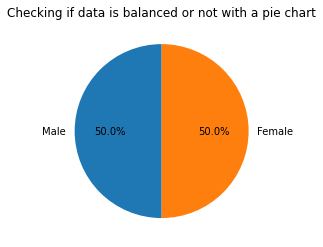

In [58]:
#Checking if data is balanced or not using pie chart for our target variable - gender
labels = df.Gender.unique()
sizes = [(df.Gender == labels[0]).sum(), (df.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checking if data is balanced or not with a pie chart")
plt.show()

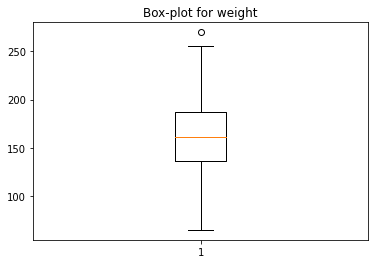

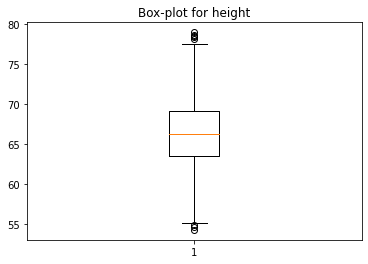

In [59]:
#Outliers
plt.boxplot(df.Weight)
plt.title('Box-plot for weight')
plt.show()

plt.boxplot(df.Height)
plt.title('Box-plot for height')
plt.show()

In [60]:
#finding relationship between gender and height
print(df.groupby('Gender')['Height'].describe())

         count       mean       std  ...        50%        75%        max
Gender                               ...                                 
Female  5000.0  63.708774  2.696284  ...  63.730924  65.563565  73.389586
Male    5000.0  69.026346  2.863362  ...  69.027709  70.988744  78.998742

[2 rows x 8 columns]


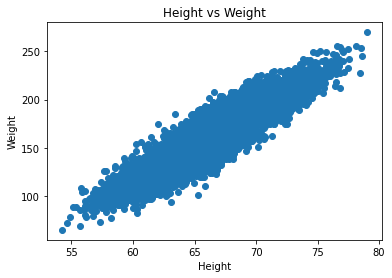

In [61]:
#scatter plot to analyse height vs weight
weight = df['Weight']
height = df['Height']
plt.scatter(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")
plt.show()

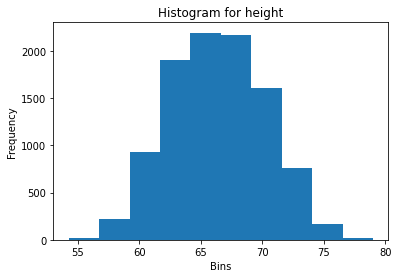

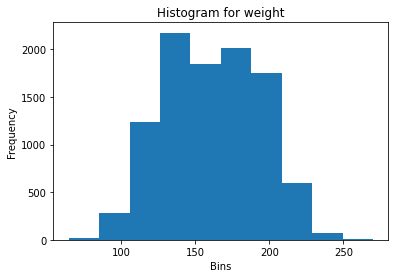

In [62]:
#histogram for height
plt.hist(height, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for height')
plt.show()

#histogram for weight
plt.hist(weight, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for weight')
plt.show()

In [63]:
#model to split data
train, test = train_test_split(df, test_size=0.2)
print("Test data set")
print(test.head())
print()
print("Train data set")
print(train.head())
print('')
print("No. of data in test:" +str(len(test)))
print("No. of data in train:" +str(len(train)))

print(train.groupby('Gender').count())
#creating x and y variables
feature_names = ['Height', 'Weight']
x_train = train[feature_names].values.tolist()
y_train = train['Gender']
x_test = test[feature_names].values.tolist()
y_test = test['Gender']

Test data set
      Gender     Height      Weight
5666  Female  67.910587  164.395262
4416    Male  71.810281  203.271067
3688    Male  71.434252  199.437923
2616    Male  71.456487  179.443186
8750  Female  62.719087  122.874560

Train data set
      Gender     Height      Weight
5130  Female  64.590286  140.176082
5763  Female  63.071171  141.214978
4417    Male  73.865890  223.464747
5947  Female  65.531554  158.598828
3455    Male  72.384493  228.209887

No. of data in test:2000
No. of data in train:8000
        Height  Weight
Gender                
Female    3989    3989
Male      4011    4011


In [64]:
#defining classifiers
clf1 = tree.DecisionTreeClassifier()
clf2 = svm.SVC(gamma='auto')
clf3 = neighbors.KNeighborsClassifier()
clf4 = GaussianNB()

#fitting data
clf1 = clf1.fit(x_train,y_train)
clf2 = clf2.fit(x_train,y_train)
clf3 = clf3.fit(x_train, y_train)
clf4 = clf4.fit(x_train, y_train)

#making predictions
prediction1 = clf1.predict(x_test)
prediction2 = clf2.predict(x_test)
prediction3 = clf3.predict(x_test)
prediction4 = clf4.predict(x_test)

In [65]:
#checking accuracy
r1 = accuracy_score(y_test, prediction1)
r2 = accuracy_score(y_test, prediction2)
r3 = accuracy_score(y_test, prediction3)
r4 = accuracy_score(y_test, prediction4)

print("Accuracy score of Model 1: DecisionTreeClassifier is "+str(r1))
print("Accuracy score of Model 2: SupportVectorMachine is "+str(r2))
print("Accuracy score of Model 3: KNN is "+str(r3))
print("Accuracy score of Model 4: GaussianNB is "+str(r4))

Accuracy score of Model 1: DecisionTreeClassifier is 0.869
Accuracy score of Model 2: SupportVectorMachine is 0.918
Accuracy score of Model 3: KNN is 0.9085
Accuracy score of Model 4: GaussianNB is 0.8905


In [66]:
#finding misclassification rate
mr1 = (1-metrics.accuracy_score(y_test, prediction1))
mr2 = (1-metrics.accuracy_score(y_test, prediction2))
mr3 = (1-metrics.accuracy_score(y_test, prediction3))
mr4 = (1-metrics.accuracy_score(y_test, prediction4))
print("Misclassification Rate of Decision Tree: "+ str(mr1))
print("Misclassification Rate of SVM: "+ str(mr2))
print("Misclassification Rate of KNN: "+ str(mr3))
print("Misclassification Rate of Naive Bayes: "+ str(mr4))

Misclassification Rate of Decision Tree: 0.131
Misclassification Rate of SVM: 0.08199999999999996
Misclassification Rate of KNN: 0.09150000000000003
Misclassification Rate of Naive Bayes: 0.10950000000000004


In [67]:
#confusion matrix

#decision tree
cm1 = confusion_matrix(y_test, prediction1)
TP1 = cm1[1,1]
TN1 = cm1[0,0]
FP1 = cm1[0,1]
FN1 = cm1[1,0]

#svm
cm2 = confusion_matrix(y_test, prediction2)
TP2 = cm2[1,1]
TN2 = cm2[0,0]
FP2 = cm2[0,1]
FN2 = cm2[1,0]

#knn
cm3 = confusion_matrix(y_test, prediction3)
TP3 = cm3[1,1]
TN3 = cm3[0,0]
FP3 = cm3[0,1]
FN3 = cm3[1,0]

#naive-bayes
cm4 = confusion_matrix(y_test, prediction4)
TP4 = cm4[1,1]
TN4 = cm4[0,0]
FP4 = cm4[0,1]
FN4 = cm4[1,0]

#sensitivity
sen1 = TP1 / float(FN1 + TP1)
sen2 = TP2 / float(FN2 + TP2)
sen3 = TP3 / float(FN3 + TP3)
sen4 = TP4 / float(FN4 + TP4)

#specificity
spec1 = TN1 / (TN1 + FP1)
spec2 = TN2 / (TN2 + FP2)
spec3 = TN3 / (TN3 + FP3)
spec4 = TN4 / (TN4 + FP4)

#printing
print("Sensitivity Rate of Decision Tree: "+ str(sen1))
print("Sensitivity Rate of SVM: "+ str(sen2))
print("Sensitivity Rate of KNN: "+ str(sen3))
print("Sensitivity Rate of Naive Bayes: "+ str(sen4))
print()
print("Specificity Rate of Decision Tree: "+ str(spec1))
print("Specificity Rate of SVM: "+ str(spec2))
print("Specificity Rate of KNN: "+ str(spec3))
print("Specificity Rate of Naive Bayes: "+ str(spec4))
print()
print("Classification Report: Decision Tree")
print(classification_report(y_test, prediction1))
print("Classification Report: SVM")
print(classification_report(y_test, prediction2))
print("Classification Report: KNN")
print(classification_report(y_test, prediction3))
print("Classification Report: Naive-Bayes")
print(classification_report(y_test, prediction4))

Sensitivity Rate of Decision Tree: 0.8685540950455005
Sensitivity Rate of SVM: 0.917087967644085
Sensitivity Rate of KNN: 0.8968655207280081
Sensitivity Rate of Naive Bayes: 0.8806875631951466

Specificity Rate of Decision Tree: 0.8694362017804155
Specificity Rate of SVM: 0.9188921859545005
Specificity Rate of KNN: 0.9198813056379822
Specificity Rate of Naive Bayes: 0.9000989119683481

Classification Report: Decision Tree
              precision    recall  f1-score   support

      Female       0.87      0.87      0.87      1011
        Male       0.87      0.87      0.87       989

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

Classification Report: SVM
              precision    recall  f1-score   support

      Female       0.92      0.92      0.92      1011
        Male       0.92      0.92      0.92       989

    accuracy                           0.92      2000
  

In [68]:
#Making a prediction for a user
height = 71   #in inches
weight = 36   #in Pounds
prediction = clf2.predict([[height, weight]])
print("The classifier predicts that you could be " +str(prediction[0]))

The classifier predicts that you could be Male
